# Customer Attrition

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

# **1. Data Overview**

In [0]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [0]:
dd_files = {
    'telco.csv': '1xoIltGdCVtqQlYpOU-s8P6MyJlRfi2dy'
}

In [0]:
!pip install -U -q PyDrive	

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Download both files to cloud machine
for k,v in dd_files.items():
  downloaded = drive.CreateFile({'id': v}) # Get ID of file to download
  downloaded.GetContentFile('/tmp/' + k)

In [7]:
! ls /tmp

telco.csv


In [8]:
telco_df = pd.read_csv(r"/tmp/telco.csv")
print("shape: ", telco_df.shape)
#print("first row:\n", telco_df.iloc[0])
telco_df.head()

shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telco_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **1.1 SUMMARIZE THE DATA**

In [10]:
#explore column datatypes
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [172]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [173]:
telco_df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,8075-GXIUB,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


**With the maximum Monthly Charge values being $118, will the 'max value' of Total Charges be just NaN ? **

In [174]:
#describe the numerical columns and observe that it does not include Total Charges column
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [175]:
#describe object columns
telco_df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,8075-GXIUB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## With Max value of Total Charges being NaN, does the data loaded has any missing values or is it lying?

In [176]:
#check for any missing values
print ("\nMissing values :  ", telco_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",telco_df.nunique())


Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


**Notice that, .describe() function returned "Senior Citizen, Tenure and Monthly Charges" as summary of identified numerical columns. Even if we ignore "Senior Citizen" column for now as it can be converted into a boolean column later on, "Total Charges" column is not included in this summary as it is loaded as object type column when the csv was initially loaded into the dataframe. So what made a float column type to load as an object data type in the first place?**

## What if there are empty cells or columns with spaces?

In [177]:
#finding categorical columns and count by category for each column to see if any missing values can be found

print ("\nPhone Service Unique values: \n", telco_df.PhoneService.unique(), "\neach unique category count: \n ", telco_df.groupby('PhoneService')['PhoneService'].count())
print ("\nMultiple Lines Unique values: \n", telco_df.MultipleLines.unique(), "\neach unique category count: \n ", telco_df.groupby('MultipleLines')['MultipleLines'].count())
print ("\nInternet Service Unique values: \n", telco_df.InternetService.unique(), "\neach unique category count: \n ", telco_df.groupby('InternetService')['InternetService'].count())
print ("\nOnline Security Unique values: \n", telco_df.OnlineSecurity.unique(), "\neach unique category count: \n ", telco_df.groupby('OnlineSecurity')['OnlineSecurity'].count())
print ("\nOnline Backup Unique values: \n", telco_df.OnlineBackup.unique(), "\neach unique category count: \n ", telco_df.groupby('OnlineBackup')['OnlineBackup'].count())
print ("\nDevice Protection Unique values: \n", telco_df.DeviceProtection.unique(), "\neach unique category count: \n ", telco_df.groupby('DeviceProtection')['DeviceProtection'].count())
print ("\nTech Support Unique values: \n", telco_df.TechSupport.unique(), "\neach unique category count: \n ", telco_df.groupby('TechSupport')['TechSupport'].count())
print ("\nStreaming TV Unique values: \n", telco_df.StreamingTV.unique(), "\neach unique category count: \n ", telco_df.groupby('StreamingTV')['StreamingTV'].count())
print ("\nStreaming Movies Unique values: \n", telco_df.StreamingMovies.unique(), "\neach unique category count: \n ", telco_df.groupby('StreamingMovies')['StreamingMovies'].count())
print ("\nContract Unique values: \n", telco_df.Contract.unique(), "\neach unique category count: \n ", telco_df.groupby('Contract')['Contract'].count())
print ("\nPaperless Billing Unique values: \n", telco_df.PaperlessBilling.unique(), "\neach unique category count: \n ", telco_df.groupby('PaperlessBilling')['PaperlessBilling'].count())
print ("\nPayment Method Unique values: \n", telco_df.PaymentMethod.unique(), "\neach unique category count: \n ", telco_df.groupby('PaymentMethod')['PaymentMethod'].count())
print ("\nspaces or null values count in Monthly Charges column: \n ", telco_df['MonthlyCharges'].isnull().sum())
print ("\nspaces or null values count in Monthly Charges column: \n ", telco_df['TotalCharges'].isnull().sum())
print ("\nChurn Unique values: \n", telco_df.Churn.unique(), "\neach unique category count: \n ", telco_df.groupby('Churn')['Churn'].count())



Phone Service Unique values: 
 ['No' 'Yes'] 
each unique category count: 
  PhoneService
No      682
Yes    6361
Name: PhoneService, dtype: int64

Multiple Lines Unique values: 
 ['No phone service' 'No' 'Yes'] 
each unique category count: 
  MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: MultipleLines, dtype: int64

Internet Service Unique values: 
 ['DSL' 'Fiber optic' 'No'] 
each unique category count: 
  InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64

Online Security Unique values: 
 ['No' 'Yes' 'No internet service'] 
each unique category count: 
  OnlineSecurity
No                     3498
No internet service    1526
Yes                    2019
Name: OnlineSecurity, dtype: int64

Online Backup Unique values: 
 ['Yes' 'No' 'No internet service'] 
each unique category count: 
  OnlineBackup
No                     3088
No internet service    1526
Yes                    2

**With the above results, we can see that we cannot clearly identify if there are missing values in "Total Charges" column, but rest all object columns seem to match the total count based on their respective individual categories.**

## But what if we try to impose a datatype conversion restriction while loading the csv itself?

In [178]:
# Try imposing a data type restriction:
df = pd.read_csv(r"/tmp/telco.csv", encoding = "ISO-8859-1", dtype={'TotalCharges': np.float})
df.info()

## returns a ValueError as casting is not possible

ValueError: ignored

# 2. Data Manipulation

In [179]:
# restore initial shape
#initial_df_shape = telco_df.shape
initial_df_shape

(7043, 21)

In [180]:
#let's try replacing empty cells or columns with spaces (if any) present in total charges column, that went unnoticed when we analyzed it earlier:

#Replacing spaces with null values in total charges column
telco_df['TotalCharges'] = telco_df["TotalCharges"].replace(" ",np.nan)

# Let's see if we can find the culprit
telco_df.loc[telco_df["TotalCharges"].notnull() == False]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### **Yes, we did it! we found the culprit data that made the float column load as an object column!! There are around 11 rows of data that doesn't have a Total Charges value and if we eyeball the data, most of them are included with "PaperlessBilling" == No and they mailed checks to pay their bills, which means, for these 11 customers, the data was not updated immediately as the transactions were not electronic.**

### **Let's drop these 11 records of with null data from the 7043 records we have to proceed further!**

In [181]:
#Dropping null values from total charges column
telco_df = telco_df[telco_df["TotalCharges"].notnull()]
telco_df = telco_df.reset_index()[telco_df.columns]

#convert the data type to float type
telco_df["TotalCharges"] = telco_df["TotalCharges"].astype(float)

#observe the changed shape
telco_df.shape


(7032, 21)

***Let's also convert the other categorical columns into an ideal two-category data columns***

In [182]:
#for the customers, who did not opt for any internet service, 'No internet service' comment for the data is a redundant form of No. 
# Let's replace it with No for the columns containing this comment

redundantdata_cols = ['DeviceProtection','OnlineSecurity', 'OnlineBackup', 
                'StreamingTV', 'StreamingMovies','TechSupport']
for i in redundantdata_cols : 
    telco_df[i]  = telco_df[i].replace({'No internet service' : 'No'})
    
#make Senior Citizen column to True or False categorical column instead of boolean
telco_df["SeniorCitizen"] = telco_df["SeniorCitizen"].replace({1:"Yes",0:"No"})
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [183]:
telco_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


***That looks neat!***

**With the above data, we can see that at max, a customer is sticking with the company for about 72 months. If we identify the maximum number of customers who stick to a company for a particular monthly range, we can devise customer retention plans accordingly. **

In [0]:
#Tenure to categorical column
def tenure_lab(telco_df) :    
    if telco_df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telco_df["tenure"] > 12) & (telco_df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telco_df["tenure"] > 24) & (telco_df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telco_df["tenure"] > 48) & (telco_df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telco_df["tenure"] > 60 :
        return "Tenure_gt_60"
telco_df["tenure_group"] = telco_df.apply(lambda telco_df:tenure_lab(telco_df),
                                      axis = 1)


In [0]:
#Separating churn and non churn customer data
churn_cust_data     = telco_df[telco_df["Churn"] == "Yes"]
not_churn_cust_data = telco_df[telco_df["Churn"] == "No"]

In [186]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telco_df.nunique()[telco_df.nunique() < 6].keys().tolist()
print(cat_cols)
cat_cols   = [x for x in cat_cols if x not in target_col]
print(cat_cols)
num_cols   = [x for x in telco_df.columns if x not in cat_cols + target_col + Id_col]
print(num_cols)

# without the ID and target_col
data_col = [x for x in telco_df.columns if x not in target_col + Id_col]
print(data_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure_group']


# 3. Data Visualization

For the numerical columns that we found, let's plot their distribution across the churns on a histogram plot:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a0dd0d1d0>,
      dtype=object)

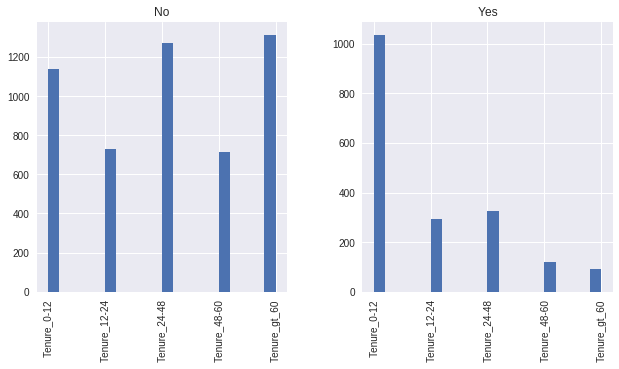

In [187]:
telco_df['tenure_group'].hist(by=telco_df.Churn, sharex=True, figsize=(10,5), bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a1f09bd30>,
      dtype=object)

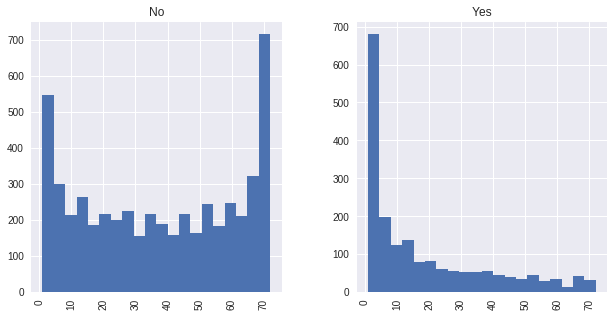

In [188]:
telco_df['tenure'].hist(by=telco_df.Churn, sharex=True, figsize=(10,5), bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a1b2d9240>,
      dtype=object)

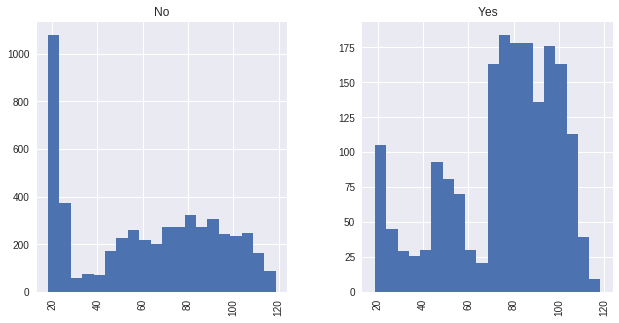

In [189]:
telco_df['MonthlyCharges'].hist(by=telco_df.Churn, sharex=True, figsize=(10,5), bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a1b21f3c8>,
      dtype=object)

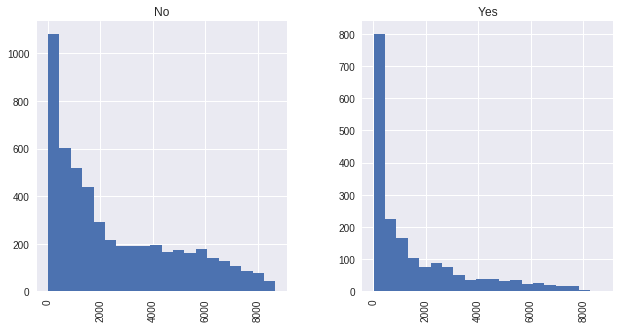

In [190]:
telco_df['TotalCharges'].hist(by=telco_df.Churn, sharex=True, figsize=(10,5), bins=20)

### Visualizing the numerical columns on Seaborn:

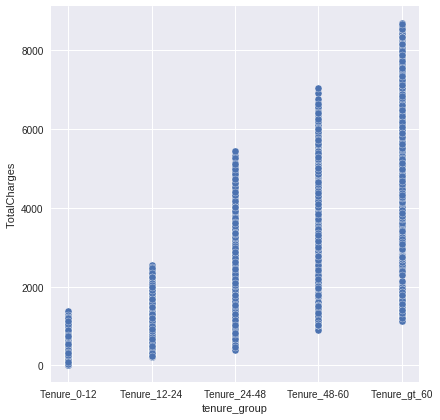

In [191]:
# visualization with seaborn
#sns.pairplot(telco_df, x_vars=['tenure','MonthlyCharges','TotalCharges'], y_vars='Sales', size=6, aspect=0.7)
sns.pairplot(telco_df, x_vars='tenure_group', y_vars='TotalCharges', size=6)

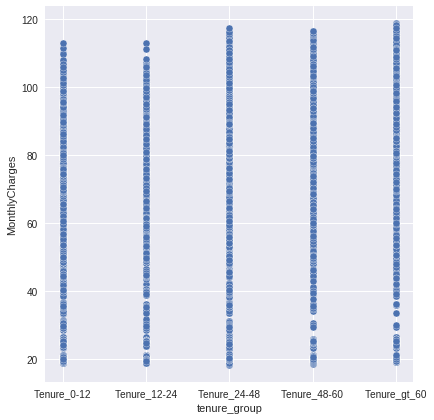

In [192]:
sns.pairplot(telco_df, x_vars='tenure_group', y_vars='MonthlyCharges', size=6)

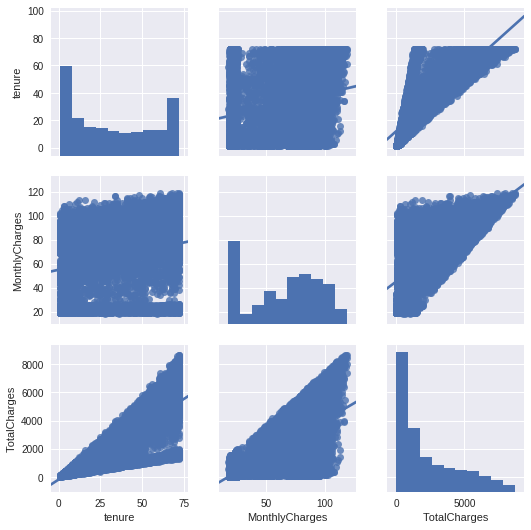

In [193]:
sns.pairplot(telco_df[['tenure','MonthlyCharges','TotalCharges']], kind="reg")

### ***Correlation matrix for the current numerical Data***

In [0]:
num_cols_data = telco_df[num_cols]

In [195]:
num_cols_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [196]:
num_cols_data.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


***Heat map showing the correlation matrix of current numerical columns present in the data:***

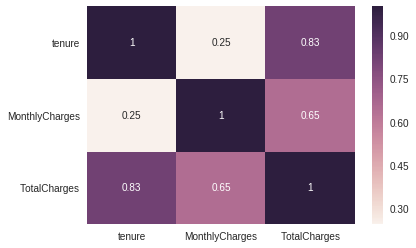

In [197]:
sns.heatmap(num_cols_data.corr(), annot=True)

# 4. Data Scaling and Normalization

In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Binary columns with 2 values
bin_cols   = telco_df.nunique()[telco_df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telco_df[i] = le.fit_transform(telco_df[i])
    
#Duplicating columns for multi value columns
telco_df = pd.get_dummies(data = telco_df,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telco_df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telco_og = telco_df.copy()
telco_df= telco_df.drop(columns = num_cols,axis = 1)
telco_df = telco_df.merge(scaled,left_index=True,right_index=True,how = "left")
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


## Correlation Matrix plot after scaling the data

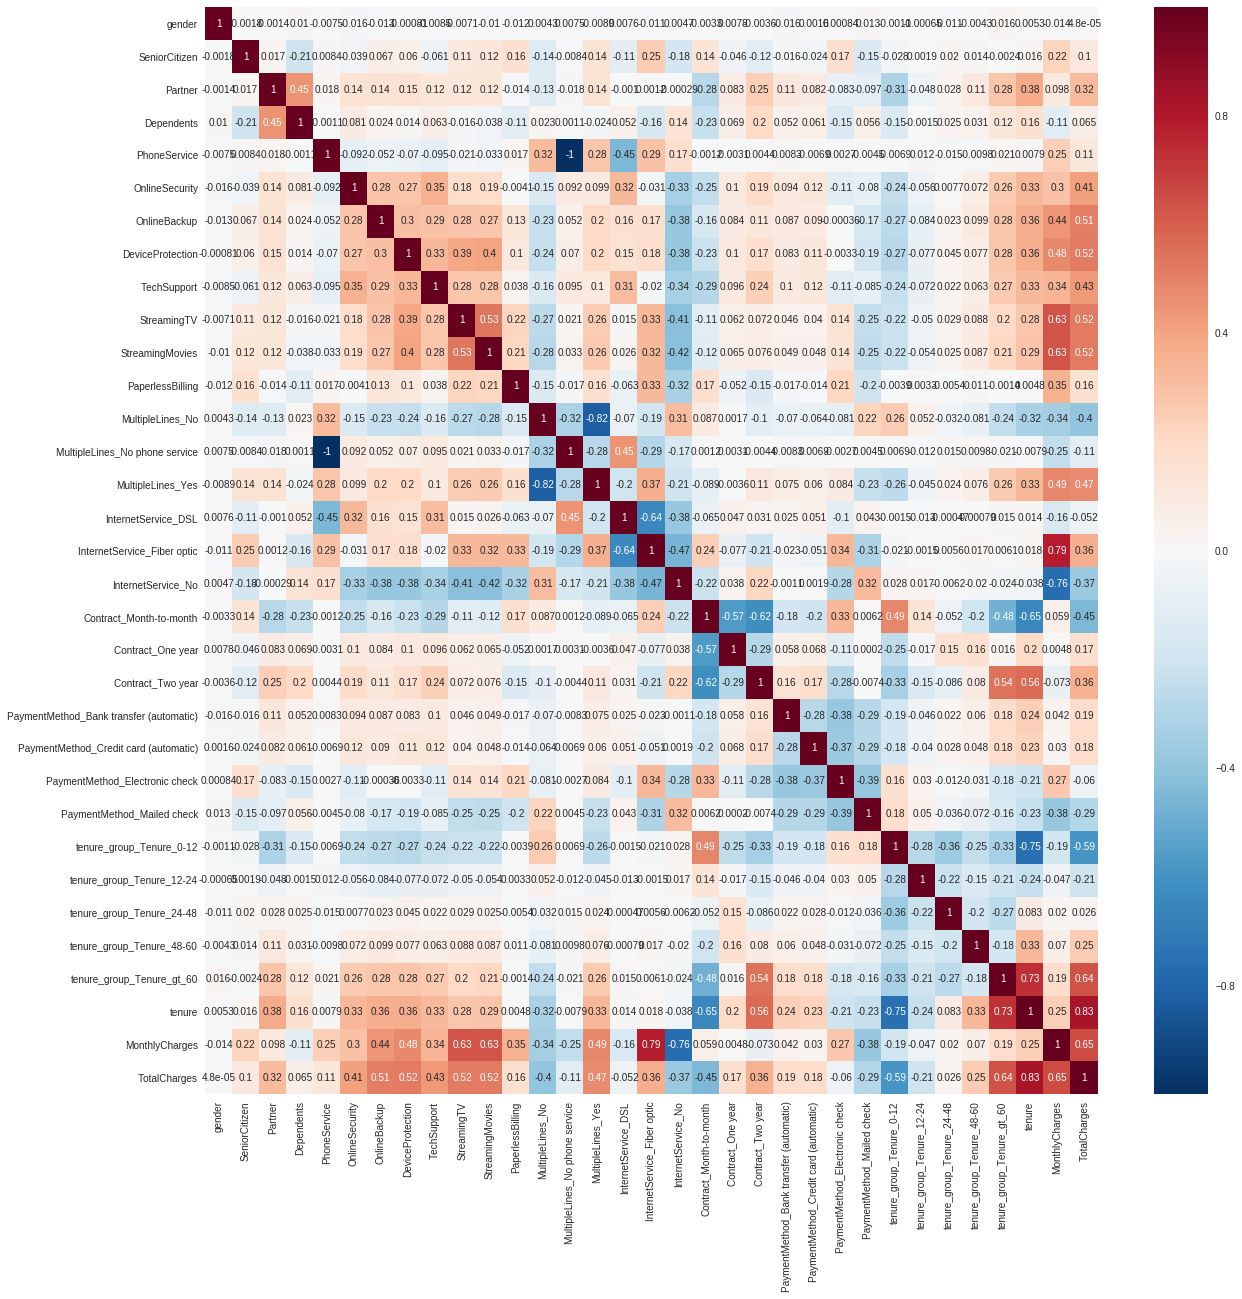

In [200]:
id_target_cols = ['customerID', 'Churn']
actual_data_cols = [i for i in telco_df.columns if i not in id_target_cols]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(telco_df[actual_data_cols].corr(), annot=True, ax=ax)

# 5. Modeling the Data

In [201]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

#splitting train and test data 
train,test = train_test_split(telco_df, test_size = .20)
    
##seperating dependent and independent variables
datacols    = [i for i in telco_df.columns if i not in Id_col + target_col]
train_X = train[datacols]
train_Y = train[target_col]
test_X  = test[datacols]
test_Y  = test[target_col]
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,datacols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(datacols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    print("\n coefficients summary: \n", coef_sumry)
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    feature_importance = abs(coef_sumry['coefficients'])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    print("\n feature importance: \n", feature_importance)

        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, max_iter=100,
                            n_jobs=None, penalty='l2', random_state=None,
                            tol=0.0001, verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y, datacols,"coefficients",threshold_plot = True)
#telco_df.head()


#telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y, datacols,"features",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
              precision    recall  f1-score   support

          0       0.87      0.90      0.88      1051
          1       0.67      0.60      0.64       356

avg / total       0.82      0.82      0.82      1407

Accuracy   Score :  0.8244491826581379

 coefficients summary: 
     coefficients                                 features
29      0.530454                tenure_group_Tenure_gt_60
18      0.501898                  Contract_Month-to-month
16      0.429365              InternetService_Fiber optic
11      0.400146                         PaperlessBilling
32      0.327277                             TotalCharges
28      0.270780                tenure_group_Tenure_48-60
10      0.254209  